In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [5]:
marathon = pd.read_csv("./data/marathon_results_2017.csv",usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"]=marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


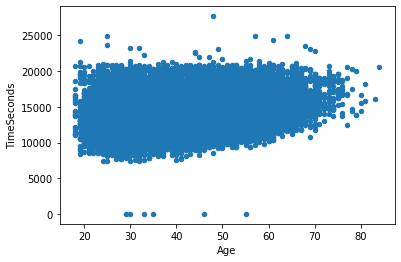

In [10]:
marathon.plot(kind="scatter",x="Age",y="TimeSeconds")

In [18]:
marathon_m = marathon["M/F"] == "M"

In [19]:
marathon_m = marathon[marathon_m]

In [20]:
marathon_f = marathon["M/F"] == "F"

In [21]:
marathon_f = marathon[marathon_f]

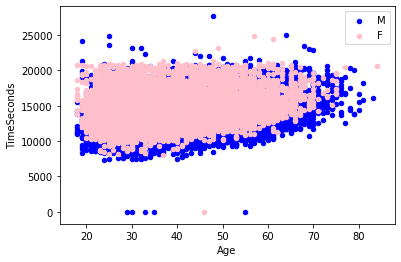

In [33]:
ax=marathon_m.plot.scatter(x="Age",y="TimeSeconds",c="blue",label="M")
marathon_f.plot.scatter(x="Age",y="TimeSeconds",c="Pink",label="F",ax=ax)

In [34]:
import datetime

In [36]:
nasa=pd.read_csv("./data/nasa_facebook_statuses.csv", usecols=["status_published","num_likes"])

In [37]:
nasa["status_published"] =pd.to_datetime(nasa["status_published"])

In [41]:
filter=(nasa['status_published'] >='2016-5-1') & (nasa['status_published'] <'2016-6-1')
nasa=nasa[filter]

In [43]:
nasa['day'] =nasa.apply(lambda row: row["status_published"].day,axis=1)

In [44]:
nasa_by_day=nasa.groupby(by='day').sum()

In [45]:
bean=pd.read_csv("./data/mrbean_facebook_statuses.csv", usecols=["status_published","num_likes"])

In [46]:
bean["status_published"] =pd.to_datetime(bean["status_published"])

In [47]:
filter=(bean['status_published'] >='2016-5-1') & (bean['status_published'] <'2016-6-1')
bean=bean[filter]

In [48]:
bean['day'] =bean.apply(lambda row: row["status_published"].day,axis=1)

In [49]:
bean_by_day=bean.groupby(by='day').sum()

In [50]:
days=nasa["day"].append(bean["day"])
days=days.unique()
fb=pd.DataFrame(index=days).sort_index()

In [52]:
fb['nasa'] =nasa_by_day["num_likes"]
fb['bean'] =bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)
fb.head()


,nasa,bean
1,60243,0.0
2,177989,0.0
3,50264,0.0
4,133302,26821.0
5,89657,0.0
